In [1]:
pip install hdbscan

Processing /home/jovyan/.cache/pip/wheels/73/5f/2f/9a259b84003b84847c259779206acecabb25ab56f1506ee72b/hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip uninstall numpy --yes

Found existing installation: numpy 1.19.4
Uninstalling numpy-1.19.4:
  Successfully uninstalled numpy-1.19.4
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numpy

  Using cached numpy-1.21.1-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

import itertools
import hdbscan
from scipy import linalg
import matplotlib as mpl
from sklearn.cluster import DBSCAN
from scipy import stats
import numpy as np

In [5]:
with open("final_lineage.txt", "r") as f:
    data = f.read()

final_lineage = json.loads(data)
final_lineage['gelmanRubin']
# chain0 = final_lineage['chains'][0]
# chain0['gelmanRubin']

{'lightness': 1.7842587060541768,
 'chromatic_a': 1.784417553563318,
 'chromatic_b': 1.9684261378051253}

In [6]:
chain0 = final_lineage['chains'][0]['selected_colours']
chain0_df = pd.json_normalize(chain0)
chain0_df

,lightness,chromatic_a,chromatic_b,rechosen,no_rej,no_bars,rejRes.l,rejRes.a,rejRes.b
0,"[39.92141674149269, 39.95517672793932, 33.9158...","[-8.579411045581622, 3.1978145807462113, -75.2...","[18.943744454440292, -55.28456188819558, -2.86...",False,1,4,1,0,1
1,"[32.755439276625474, 20.296429131033783, 36.06...","[-35.20390781894314, -5.274129975912986, -60.1...","[-51.48334080029653, 14.950174984557322, -32.8...",False,1,4,1,1,1
2,"[50.472738950228425, 18.809216833567493, 26.18...","[-63.39453629918202, -55.79657571884959, -46.0...","[-104.91740208507481, 20.415366451473318, -33....",True,42,4,16,26,33
3,"[50.472738950228425, 18.809216833567493, 26.18...","[-63.39453629918202, -55.79657571884959, -46.0...","[-104.91740208507481, 20.415366451473318, -33....",False,42,4,32,30,28
4,"[70.9504842420939, 40.54847629725381, 18.71133...","[-10.018281290482143, -1.5190694750529161, -39...","[-54.08598974192071, -33.14401564767632, -56.0...",False,14,4,7,7,11
...,...,...,...,...,...,...,...,...,...
3895,"[36.07283578586572, 70.74595487151157, 47.8735...","[81.59106602427926, -8.918565264436307, -25.19...","[51.24252912650416, 12.198585812357951, -49.95...",True,3,4,2,2,2
3896,"[36.07283578586572, 70.74595487151157, 47.8735...","[81.59106602427926, -8.918565264436307, -25.19...","[51.24252912650416, 12.198585812357951, -49.95...",True,3,4,3,1,0
3897,"[36.07283578586572, 70.74595487151157, 47.8735...","[81.59106602427926, -8.918565264436307, -25.19...","[51.24252912650416, 12.198585812357951, -49.95...",True,1,4,1,0,0
3898,"[36.07283578586572, 70.74595487151157, 47.8735...","[81.59106602427926, -8.918565264436307, -25.19...","[51.24252912650416, 12.198585812357951, -49.95...",False,3,4,1,2,2


In [7]:
chain1 = final_lineage['chains'][1]['selected_colours']
chain1_df = pd.json_normalize(chain1)
chain1_df

,lightness,chromatic_a,chromatic_b,rechosen,no_rej,no_bars,rejRes.l,rejRes.a,rejRes.b
0,"[58.20259244522314, 67.58147262855636, 86.3560...","[-37.0354434131572, -57.87805659769376, -58.20...","[13.56197524779678, -35.53810088694736, 25.129...",True,11,4,7,11,3
1,"[58.20259244522314, 67.58147262855636, 86.3560...","[-37.0354434131572, -57.87805659769376, -58.20...","[13.56197524779678, -35.53810088694736, 25.129...",True,13,4,9,8,4
2,"[58.20259244522314, 67.58147262855636, 86.3560...","[-37.0354434131572, -57.87805659769376, -58.20...","[13.56197524779678, -35.53810088694736, 25.129...",True,8,4,4,6,4
3,"[58.20259244522314, 67.58147262855636, 86.3560...","[-37.0354434131572, -57.87805659769376, -58.20...","[13.56197524779678, -35.53810088694736, 25.129...",False,3,4,2,2,0
4,"[27.60550888163858, 80.94891518917122, 71.4778...","[-44.13443432563314, -48.82918244602593, -61.7...","[2.511873559447608, 56.45862802003519, -24.665...",False,9,4,7,4,3
...,...,...,...,...,...,...,...,...,...
3895,"[70.8329106228669, 36.75264703338236, 82.77142...","[9.270520487467607, -6.365598048513039, -21.15...","[25.131118129447557, 32.874286891532634, -10.8...",True,13,4,13,3,5
3896,"[70.8329106228669, 36.75264703338236, 82.77142...","[9.270520487467607, -6.365598048513039, -21.15...","[25.131118129447557, 32.874286891532634, -10.8...",True,4,4,3,2,1
3897,"[70.8329106228669, 36.75264703338236, 82.77142...","[9.270520487467607, -6.365598048513039, -21.15...","[25.131118129447557, 32.874286891532634, -10.8...",True,21,4,18,6,11
3898,"[70.8329106228669, 36.75264703338236, 82.77142...","[9.270520487467607, -6.365598048513039, -21.15...","[25.131118129447557, 32.874286891532634, -10.8...",False,5,4,5,0,3


In [8]:
chain2 = final_lineage['chains'][2]['selected_colours']
chain2_df = pd.json_normalize(chain2)
chain2_df

,lightness,chromatic_a,chromatic_b,rechosen,no_rej,no_bars,rejRes.l,rejRes.a,rejRes.b
0,"[59.26166036141147, 63.520565483919185, 85.058...","[-59.989166109231654, 23.287068399377716, 7.84...","[-64.29165567731806, -61.000372348144154, -70....",False,19,4,16,6,11
1,"[56.877453623116295, 50.129193961950655, 83.79...","[-48.685770433717714, 63.6000320110117, -64.17...","[-16.855263197868695, 58.38016707146528, 52.44...",True,97,4,45,62,74
2,"[56.877453623116295, 50.129193961950655, 83.79...","[-48.685770433717714, 63.6000320110117, -64.17...","[-16.855263197868695, 58.38016707146528, 52.44...",False,11,4,4,10,9
3,"[64.7382844740387, 26.114166217403493, 79.4739...","[-40.56298861416729, -3.7881510318329177, -57....","[-76.39689005569778, 18.36079065512635, 38.608...",False,13,4,10,8,8
4,"[80.85380679604901, 38.23952269267905, 81.5182...","[-13.914917812008412, -11.794166900865505, -73...","[-52.393209993036095, 56.80406711945182, 26.38...",True,10,4,6,5,5
...,...,...,...,...,...,...,...,...,...
3895,"[43.40710795011974, 31.624452802170534, 16.412...","[-23.338822637054733, 42.12590612660435, 4.230...","[-107.07221593750097, 42.221359514264364, -82....",False,25,4,19,10,18
3896,"[82.60020251637232, 35.66744036914016, 26.1283...","[-19.638874935642477, 89.68558426543542, 31.42...","[-83.56215865724866, -17.619514289033752, -52....",True,13,4,9,8,6
3897,"[82.60020251637232, 35.66744036914016, 26.1283...","[-19.638874935642477, 89.68558426543542, 31.42...","[-83.56215865724866, -17.619514289033752, -52....",False,15,4,12,13,11
3898,"[49.083351804282195, 74.45268691331796, 52.937...","[-65.39801347281198, 94.78742116087984, -74.98...","[-95.15736325138525, -77.95935799510286, -28.8...",False,272,4,177,246,187


In [9]:
chain3 = final_lineage['chains'][3]['selected_colours']
chain3_df = pd.json_normalize(chain3)
chain3_df

,lightness,chromatic_a,chromatic_b,rechosen,no_rej,no_bars,rejRes.l,rejRes.a,rejRes.b
0,"[18.373386860364125, 47.06420174464087, 53.592...","[89.08425186015086, -20.42036904881546, 37.888...","[-43.7853581336954, 55.96903662507748, 61.7107...",False,77,4,60,44,48
1,"[43.28666442674352, 75.47123919716262, 45.9258...","[78.50714783627087, -63.31456107874091, 56.893...","[-67.43407026932742, 50.37607874725051, 38.639...",False,33,4,22,22,24
2,"[33.536521519828106, 61.3891428256336, 45.7520...","[51.3251517123382, -19.81438216693487, 31.1253...","[-54.094714685631, 39.93453292609969, 30.14586...",True,35,4,11,19,26
3,"[33.536521519828106, 61.3891428256336, 45.7520...","[51.3251517123382, -19.81438216693487, 31.1253...","[-54.094714685631, 39.93453292609969, 30.14586...",False,1,4,0,1,0
4,"[48.700445477698175, 64.79910674042927, 63.745...","[32.73809547506525, 27.422717272349686, 5.5713...","[-49.865886681615294, 30.46776214663936, -62.6...",True,9,4,1,7,4
...,...,...,...,...,...,...,...,...,...
3895,"[51.33349455131115, 17.109884720853636, 69.543...","[-46.021148634122476, 32.26108298569755, 47.98...","[15.054840097986123, -41.86232935647123, 45.60...",True,34,4,24,20,16
3896,"[51.33349455131115, 17.109884720853636, 69.543...","[-46.021148634122476, 32.26108298569755, 47.98...","[15.054840097986123, -41.86232935647123, 45.60...",True,3,4,3,2,2
3897,"[51.33349455131115, 17.109884720853636, 69.543...","[-46.021148634122476, 32.26108298569755, 47.98...","[15.054840097986123, -41.86232935647123, 45.60...",True,7,4,5,3,2
3898,"[51.33349455131115, 17.109884720853636, 69.543...","[-46.021148634122476, 32.26108298569755, 47.98...","[15.054840097986123, -41.86232935647123, 45.60...",False,5,4,3,1,2


In [10]:
chain4 = final_lineage['chains'][4]['selected_colours']
chain4_df = pd.json_normalize(chain4)
chain4_df

,lightness,chromatic_a,chromatic_b,rechosen,no_rej,no_bars,rejRes.l,rejRes.a,rejRes.b
0,"[57.205033534172344, 62.2222277473621, 60.6055...","[37.413096106698646, 78.67619235294075, 87.151...","[47.00137336418135, 72.24687424787032, 68.5380...",False,68,4,34,61,52
1,"[30.4604873104062, 58.0673688981142, 35.697365...","[45.55791155005475, 51.7033708273282, 79.08015...","[-12.068074670137698, 61.46446174380585, 36.44...",False,17,4,5,11,13
2,"[46.93473908539039, 35.234759281122706, 50.605...","[32.15180476261662, 64.91132369147651, 39.6960...","[35.35161520596073, 25.454614008186333, 63.055...",False,49,4,21,33,31
3,"[54.134146527004134, 24.328808045376817, 42.54...","[-17.50578359669062, 64.01266859315646, 61.750...","[-41.48689376051588, -50.66315393428385, 78.85...",False,13,4,8,9,7
4,"[80.37520534267523, 19.420710170848967, 57.436...","[-27.463629889276866, 83.70455886829939, 86.03...","[-75.62246106165834, 40.381595577634464, 79.44...",True,105,4,75,89,79
...,...,...,...,...,...,...,...,...,...
3895,"[83.50584844009454, 34.99754240632629, 63.8607...","[17.653186985786384, 37.51835903798811, 11.558...","[-53.396657139077625, 17.053021589151097, 27.8...",True,7,4,3,2,5
3896,"[83.50584844009454, 34.99754240632629, 63.8607...","[17.653186985786384, 37.51835903798811, 11.558...","[-53.396657139077625, 17.053021589151097, 27.8...",True,0,4,0,0,0
3897,"[83.50584844009454, 34.99754240632629, 63.8607...","[17.653186985786384, 37.51835903798811, 11.558...","[-53.396657139077625, 17.053021589151097, 27.8...",True,2,4,1,1,0
3898,"[83.50584844009454, 34.99754240632629, 63.8607...","[17.653186985786384, 37.51835903798811, 11.558...","[-53.396657139077625, 17.053021589151097, 27.8...",False,5,4,3,1,2


In [11]:
#adds autorejections then removes 'burn-in'
import math
def add_autorejections(df, parameter):
    parameter_list = []
    for index, row in df.iterrows():
        param_list = row[parameter]
        parameter_list.append(param_list)
        no_rej = row['no_rej']
        if no_rej > 0:
            for i in list(range(no_rej)):
                parameter_list.append(param_list)
    burn_in = math.floor(len(parameter_list)/2)
    return parameter_list[burn_in:]

In [12]:
#chain0
chain0_l = add_autorejections(chain0_df, 'lightness')
chain0_a = add_autorejections(chain0_df, 'chromatic_a')
chain0_b = add_autorejections(chain0_df, 'chromatic_b')

#chain1
chain1_l = add_autorejections(chain1_df, 'lightness')
chain1_a = add_autorejections(chain1_df, 'chromatic_a')
chain1_b = add_autorejections(chain1_df, 'chromatic_b')

#chain2
chain2_l = add_autorejections(chain2_df, 'lightness')
chain2_a = add_autorejections(chain2_df, 'chromatic_a')
chain2_b = add_autorejections(chain2_df, 'chromatic_b')

#chain3
chain3_l = add_autorejections(chain3_df, 'lightness')
chain3_a = add_autorejections(chain3_df, 'chromatic_a')
chain3_b = add_autorejections(chain3_df, 'chromatic_b')

#chain4
chain4_l = add_autorejections(chain4_df, 'lightness')
chain4_a = add_autorejections(chain4_df, 'chromatic_a')
chain4_b = add_autorejections(chain4_df, 'chromatic_b')

In [13]:
print("chain0 length:", len(chain0_l))
print("chain1 length:", len(chain1_l))
print("chain2 length:", len(chain2_l))
print("chain3 length:", len(chain3_l))
print("chain4 length:", len(chain4_l))
print("total iterations:", sum([len(chain0_l),len(chain1_l),len(chain2_l),len(chain3_l),len(chain4_l)]))

chain0 length: 47588
chain1 length: 45357
chain2 length: 45863
chain3 length: 45856
chain4 length: 47213
total iterations: 231877


In [14]:
def get_bar(auto_list, index):
    bar_list = [params[index] for params in auto_list]
    return bar_list

#bar1
#lightness
c1l0 = get_bar(chain0_l, 0)
c1l1 = get_bar(chain1_l, 0)
c1l2 = get_bar(chain2_l, 0)
c1l3 = get_bar(chain3_l, 0)
c1l4 = get_bar(chain4_l, 0)

#chromatic_a
c1a0 = get_bar(chain0_a, 0)
c1a1 = get_bar(chain1_a, 0)
c1a2 = get_bar(chain2_a, 0)
c1a3 = get_bar(chain3_a, 0)
c1a4 = get_bar(chain4_a, 0)

#chromatic_b
c1b0 = get_bar(chain0_b, 0)
c1b1 = get_bar(chain1_b, 0)
c1b2 = get_bar(chain2_b, 0)
c1b3 = get_bar(chain3_b, 0)
c1b4 = get_bar(chain4_b, 0)

#bar2
#lightness
c2l0 = get_bar(chain0_l, 1)
c2l1 = get_bar(chain1_l, 1)
c2l2 = get_bar(chain2_l, 1)
c2l3 = get_bar(chain3_l, 1)
c2l4 = get_bar(chain4_l, 1)

#chromatic_a
c2a0 = get_bar(chain0_a, 1)
c2a1 = get_bar(chain1_a, 1)
c2a2 = get_bar(chain2_a, 1)
c2a3 = get_bar(chain3_a, 1)
c2a4 = get_bar(chain4_a, 1)

#chromatic_b
c2b0 = get_bar(chain0_b, 1)
c2b1 = get_bar(chain1_b, 1)
c2b2 = get_bar(chain2_b, 1)
c2b3 = get_bar(chain3_b, 1)
c2b4 = get_bar(chain4_b, 1)

#bar3
#lightness
c3l0 = get_bar(chain0_l, 2)
c3l1 = get_bar(chain1_l, 2)
c3l2 = get_bar(chain2_l, 2)
c3l3 = get_bar(chain3_l, 2)
c3l4 = get_bar(chain4_l, 2)

#chromatic_a
c3a0 = get_bar(chain0_a, 2)
c3a1 = get_bar(chain1_a, 2)
c3a2 = get_bar(chain2_a, 2)
c3a3 = get_bar(chain3_a, 2)
c3a4 = get_bar(chain4_a, 2)

#chromatic_b
c3b0 = get_bar(chain0_b, 2)
c3b1 = get_bar(chain1_b, 2)
c3b2 = get_bar(chain2_b, 2)
c3b3 = get_bar(chain3_b, 2)
c3b4 = get_bar(chain4_b, 2)

#bar4
#lightness
c4l0 = get_bar(chain0_l, 3)
c4l1 = get_bar(chain1_l, 3)
c4l2 = get_bar(chain2_l, 3)
c4l3 = get_bar(chain3_l, 3)
c4l4 = get_bar(chain4_l, 3)

#chromatic_a
c4a0 = get_bar(chain0_a, 3)
c4a1 = get_bar(chain1_a, 3)
c4a2 = get_bar(chain2_a, 3)
c4a3 = get_bar(chain3_a, 3)
c4a4 = get_bar(chain4_a, 3)

#chromatic_b
c4b0 = get_bar(chain0_b, 3)
c4b1 = get_bar(chain1_b, 3)
c4b2 = get_bar(chain2_b, 3)
c4b3 = get_bar(chain3_b, 3)
c4b4 = get_bar(chain4_b, 3)

In [15]:
def iterate_df(param_list, bar, param):
    iterations = list(range(1, len(param_list) + 1))
    bar = ['bar'+str(bar)] * len(param_list)
    param = [param] * len(param_list)
    zipped = list(zip(iterations, param_list, bar, param))

    df = pd.DataFrame(zipped, columns = ['NumberIterations', 'Value', 'Bar', 'Parameter'])
    return df

In [16]:
# lightness dfs
b1_l = [c1l0, c1l1, c1l2, c1l3, c1l4]
b2_l = [c2l0, c2l1, c2l2, c2l3, c2l4]
b3_l = [c3l0, c3l1, c3l2, c3l3, c3l4]
b4_l = [c4l0, c4l1, c4l2, c4l3, c4l4]
lightness_1 = [iterate_df(b1, 1, 'lightness') for b1 in b1_l]
lightness_2 = [iterate_df(b2, 2, 'lightness') for b2 in b2_l]
lightness_3 = [iterate_df(b3, 3, 'lightness') for b3 in b3_l]
lightness_4 = [iterate_df(b4, 4, 'lightness') for b4 in b4_l]

#chromatic_a dfs
b1_a = [c1a0, c1a1, c1a2, c1a3, c1a4]
b2_a = [c2a0, c2a1, c2a2, c2a3, c2a4]
b3_a = [c3a0, c3a1, c3a2, c3a3, c3a4]
b4_a = [c4a0, c4a1, c4a2, c4a3, c4a4]
chromatica_1 = [iterate_df(b1, 1, 'chromatic_a') for b1 in b1_a]
chromatica_2 = [iterate_df(b1, 2, 'chromatic_a') for b1 in b2_a]
chromatica_3 = [iterate_df(b1, 3, 'chromatic_a') for b1 in b3_a]
chromatica_4 = [iterate_df(b1, 4, 'chromatic_a') for b1 in b4_a]

#chromatic_b dfs
b1_b = [c1b0, c1b1, c1b2, c1b3, c1b4]
b2_b = [c2b0, c2b1, c2b2, c2b3, c2b4]
b3_b = [c3b0, c3b1, c3b2, c3b3, c3b4]
b4_b = [c4b0, c4b1, c4b2, c4b3, c4b4]
chromaticb_1 = [iterate_df(b1, 1, 'chromatic_b') for b1 in b1_b]
chromaticb_2 = [iterate_df(b1, 2, 'chromatic_b') for b1 in b2_b]
chromaticb_3 = [iterate_df(b1, 3, 'chromatic_b') for b1 in b3_b]
chromaticb_4 = [iterate_df(b1, 4, 'chromatic_b') for b1 in b4_b]


In [17]:
chain1_params = [lightness_1[0], lightness_2[0], lightness_3[0], lightness_4[0], chromatica_1[0], chromatica_2[0], chromatica_3[0], chromatica_4[0], chromaticb_1[0], chromaticb_2[0], chromaticb_3[0], chromaticb_4[0]]
chain1_params_df = pd.concat(chain1_params)
chain1_params_df


,NumberIterations,Value,Bar,Parameter
0,1,35.626571,bar1,lightness
1,2,35.626571,bar1,lightness
2,3,35.626571,bar1,lightness
3,4,35.626571,bar1,lightness
4,5,35.626571,bar1,lightness
...,...,...,...,...
47583,47584,-5.540346,bar4,chromatic_b
47584,47585,-5.540346,bar4,chromatic_b
47585,47586,-5.540346,bar4,chromatic_b
47586,47587,-5.540346,bar4,chromatic_b


In [19]:
# chain0_params = [lightness_l[0], lightness_2[0], lightness_3[0], lightness_4[0], chromatica_1[0], chromatica_2[0], chromatica_3[0], chromatica_4[0], chromaticb_1[0], chromaticb_2[0], chromaticb_3[0], chromaticb_4[0]]
# chain0_params_df = pd.concat(chain0_params)
# chain1_params = [lightness_1[1], lightness_2[1], lightness_3[1], lightness_4[1], chromatica_1[1], chromatica_2[1], chromatica_3[1], chromatica_4[1], chromaticb_1[1], chromaticb_2[1], chromaticb_3[1], chromaticb_4[1]]
# chain1_params_df = pd.concat(chain1_params)
# chain2_params = [lightness_1[2], lightness_2[2], lightness_3[2], lightness_4[2], chromatica_1[2], chromatica_2[2], chromatica_3[2], chromatica_4[2], chromaticb_1[2], chromaticb_2[2], chromaticb_3[2], chromaticb_4[2]]
# chain2_params_df = pd.concat(chain2_params)
# chain3_params = [lightness_1[3], lightness_2[3], lightness_3[3], lightness_4[3], chromatica_1[3], chromatica_2[3], chromatica_3[3], chromatica_4[3], chromaticb_1[3], chromaticb_2[3], chromaticb_3[3], chromaticb_4[3]]
# chain3_params_df = pd.concat(chain3_params)
# chain4_params = [lightness_1[4], lightness_2[4], lightness_3[4], lightness_4[4], chromatica_1[4], chromatica_2[4], chromatica_3[4], chromatica_4[4], chromaticb_1[4], chromaticb_2[4], chromaticb_3[4], chromaticb_4[4]]
# chain4_params_df = pd.concat(chain4_params)
# # (((chain0_params_df.merge(chain1_params_df, on='NumberIterations')).merge(chain2_params_df, on='NumberIterations')).merge(chain3_params_df, on='NumberIterations').merge(chain4_params_df, on='NumberIterations'))




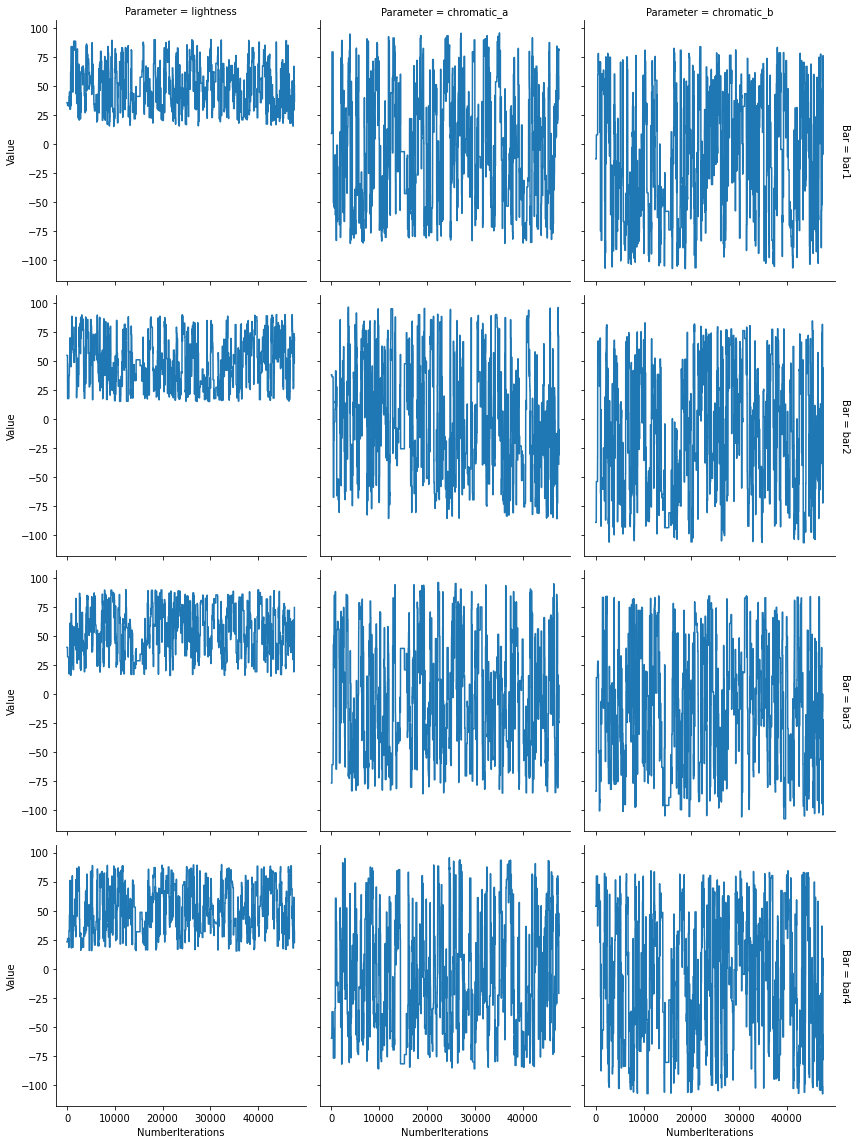

In [20]:
def create_iterations(df):
    grid = sns.FacetGrid(df, col='Parameter', row='Bar', margin_titles=True, height = 4)
    grid.map(sns.lineplot, 'NumberIterations', 'Value')
    return grid

create_iterations(chain1_params_df)

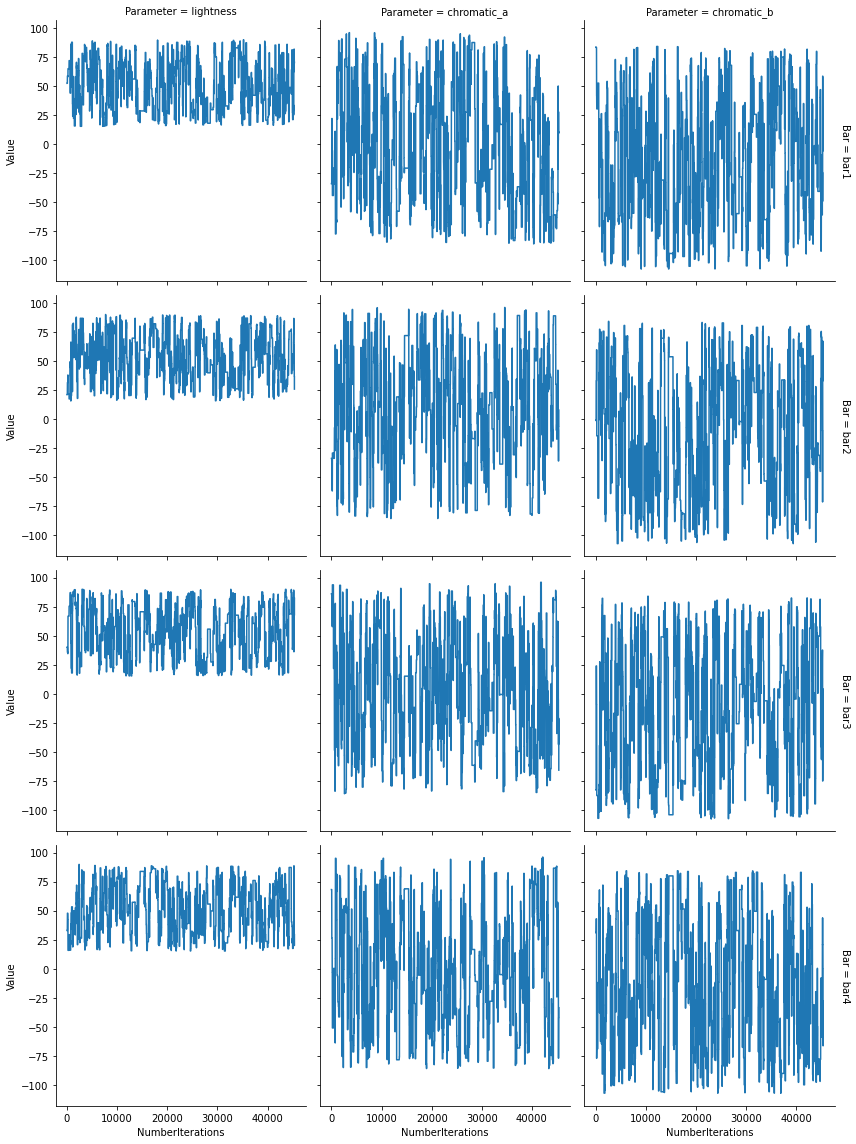

In [21]:
chain2_params = [lightness_1[1], lightness_2[1], lightness_3[1], lightness_4[1], chromatica_1[1], chromatica_2[1], chromatica_3[1], chromatica_4[1], chromaticb_1[1], chromaticb_2[1], chromaticb_3[1], chromaticb_4[1]]
chain2_params_df = pd.concat(chain2_params)
create_iterations(chain2_params_df)

In [22]:
chain0_params = [lightness_1[0], lightness_2[0], lightness_3[0], lightness_4[0], chromatica_1[0], chromatica_2[0], chromatica_3[0], chromatica_4[0], chromaticb_1[0], chromaticb_2[0], chromaticb_3[0], chromaticb_4[0]]
chain1_params_df = pd.concat(chain1_params)

chain2_params = [lightness_1[1], lightness_2[1], lightness_3[1], lightness_4[1], chromatica_1[1], chromatica_2[1], chromatica_3[1], chromatica_4[1], chromaticb_1[1], chromaticb_2[1], chromaticb_3[1], chromaticb_4[1]]
chain2_params_df = pd.concat(chain2_params)

chain3_params = [lightness_1[2], lightness_2[2], lightness_3[2], lightness_4[2], chromatica_1[2], chromatica_2[2], chromatica_3[2], chromatica_4[2], chromaticb_1[2], chromaticb_2[2], chromaticb_3[2], chromaticb_4[2]]
chain3_params_df = pd.concat(chain3_params)

chain4_params = [lightness_1[2], lightness_2[2], lightness_3[2], lightness_4[2], chromatica_1[2], chromatica_2[2], chromatica_3[2], chromatica_4[2], chromaticb_1[2], chromaticb_2[2], chromaticb_3[2], chromaticb_4[2]]
chain3_params_df = pd.concat(chain3_params)

chain1_params = [lightness_1[0], lightness_2[0], lightness_3[0], lightness_4[0], chromatica_1[0], chromatica_2[0], chromatica_3[0], chromatica_4[0], chromaticb_1[0], chromaticb_2[0], chromaticb_3[0], chromaticb_4[0]]
chain1_params_df = pd.concat(chain1_params)


In [23]:
total_df = pd.concat([chain0_df, chain1_df, chain2_df, chain3_df, chain4_df])
total_df

,lightness,chromatic_a,chromatic_b,rechosen,no_rej,no_bars,rejRes.l,rejRes.a,rejRes.b
0,"[39.92141674149269, 39.95517672793932, 33.9158...","[-8.579411045581622, 3.1978145807462113, -75.2...","[18.943744454440292, -55.28456188819558, -2.86...",False,1,4,1,0,1
1,"[32.755439276625474, 20.296429131033783, 36.06...","[-35.20390781894314, -5.274129975912986, -60.1...","[-51.48334080029653, 14.950174984557322, -32.8...",False,1,4,1,1,1
2,"[50.472738950228425, 18.809216833567493, 26.18...","[-63.39453629918202, -55.79657571884959, -46.0...","[-104.91740208507481, 20.415366451473318, -33....",True,42,4,16,26,33
3,"[50.472738950228425, 18.809216833567493, 26.18...","[-63.39453629918202, -55.79657571884959, -46.0...","[-104.91740208507481, 20.415366451473318, -33....",False,42,4,32,30,28
4,"[70.9504842420939, 40.54847629725381, 18.71133...","[-10.018281290482143, -1.5190694750529161, -39...","[-54.08598974192071, -33.14401564767632, -56.0...",False,14,4,7,7,11
...,...,...,...,...,...,...,...,...,...
3895,"[83.50584844009454, 34.99754240632629, 63.8607...","[17.653186985786384, 37.51835903798811, 11.558...","[-53.396657139077625, 17.053021589151097, 27.8...",True,7,4,3,2,5
3896,"[83.50584844009454, 34.99754240632629, 63.8607...","[17.653186985786384, 37.51835903798811, 11.558...","[-53.396657139077625, 17.053021589151097, 27.8...",True,0,4,0,0,0
3897,"[83.50584844009454, 34.99754240632629, 63.8607...","[17.653186985786384, 37.51835903798811, 11.558...","[-53.396657139077625, 17.053021589151097, 27.8...",True,2,4,1,1,0
3898,"[83.50584844009454, 34.99754240632629, 63.8607...","[17.653186985786384, 37.51835903798811, 11.558...","[-53.396657139077625, 17.053021589151097, 27.8...",False,5,4,3,1,2


In [24]:
from collections import Counter
no_rej = total_df['no_rej']
avg_rej = sum(no_rej)/len(no_rej)
avg_rej

22.782153846153847

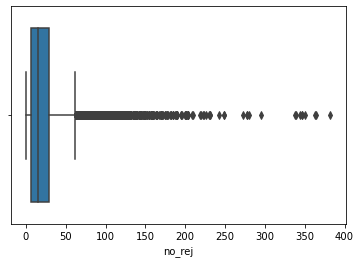

In [25]:
sns.boxplot(x='no_rej', data=total_df)

In [26]:
no_rejs = len(no_rej)
rej_l = sum(total_df['rejRes.l'])/no_rejs
rej_a = sum(total_df['rejRes.a'])/no_rejs
rej_b = sum(total_df['rejRes.b'])/no_rejs

print('Average number lightness rejections', rej_l)
print('Average number chromatic a rejections', rej_a)
print('Average numeber chromatic b rejections', rej_b)

Average number lightness rejections 13.965076923076923
Average number chromatic a rejections 14.384307692307692
Average numeber chromatic b rejections 13.847692307692308


In [27]:
rechosen = total_df['rechosen']
total = len(rechosen)
no_true = len(rechosen[rechosen])
percent_true = (no_true/total) * 100
100 - percent_true

42.53333333333333

In [35]:
all_l= chain0_l + chain1_l + chain2_l + chain3_l + chain4_l
no_rej = sum(total_df['no_rej'])
total_rej = no_rej + len(~rechosen[rechosen])
percent_na = (total_rej/len(all_l)) * 100
print(len(~rechosen[rechosen]))
print(no_rej)
print(total_rej)
print(len(all_l))

11206
444252
455458
231877


In [50]:
all_l= chain0_l + chain1_l + chain2_l + chain3_l + chain4_l
rechosen = 0
for i in range(1, len(all_l)):
    if all_l[i] == all_l[i-1]:
        rechosen +=1
percent_not_accepted = (rechosen/len(all_l)) * 100
100 - percent_not_accepted

1.7737852395882356

In [51]:
# l_b1 = c1l0 + c1l1 + c1l2 + c1l3 + c1l4
# sns.displot(lb1, )

In [52]:
all_params = lightness_1 + lightness_2 + lightness_3 + lightness_4 + chromatica_1 + chromatica_2 + chromatica_3 + chromatica_4 + chromaticb_1 + chromaticb_2 + chromaticb_3 + chromaticb_4

all_params_df = pd.concat(all_params)
all_params_df


,NumberIterations,Value,Bar,Parameter
0,1,35.626571,bar1,lightness
1,2,35.626571,bar1,lightness
2,3,35.626571,bar1,lightness
3,4,35.626571,bar1,lightness
4,5,35.626571,bar1,lightness
...,...,...,...,...
47208,47209,-19.047565,bar4,chromatic_b
47209,47210,-58.220393,bar4,chromatic_b
47210,47211,-58.220393,bar4,chromatic_b
47211,47212,-58.220393,bar4,chromatic_b


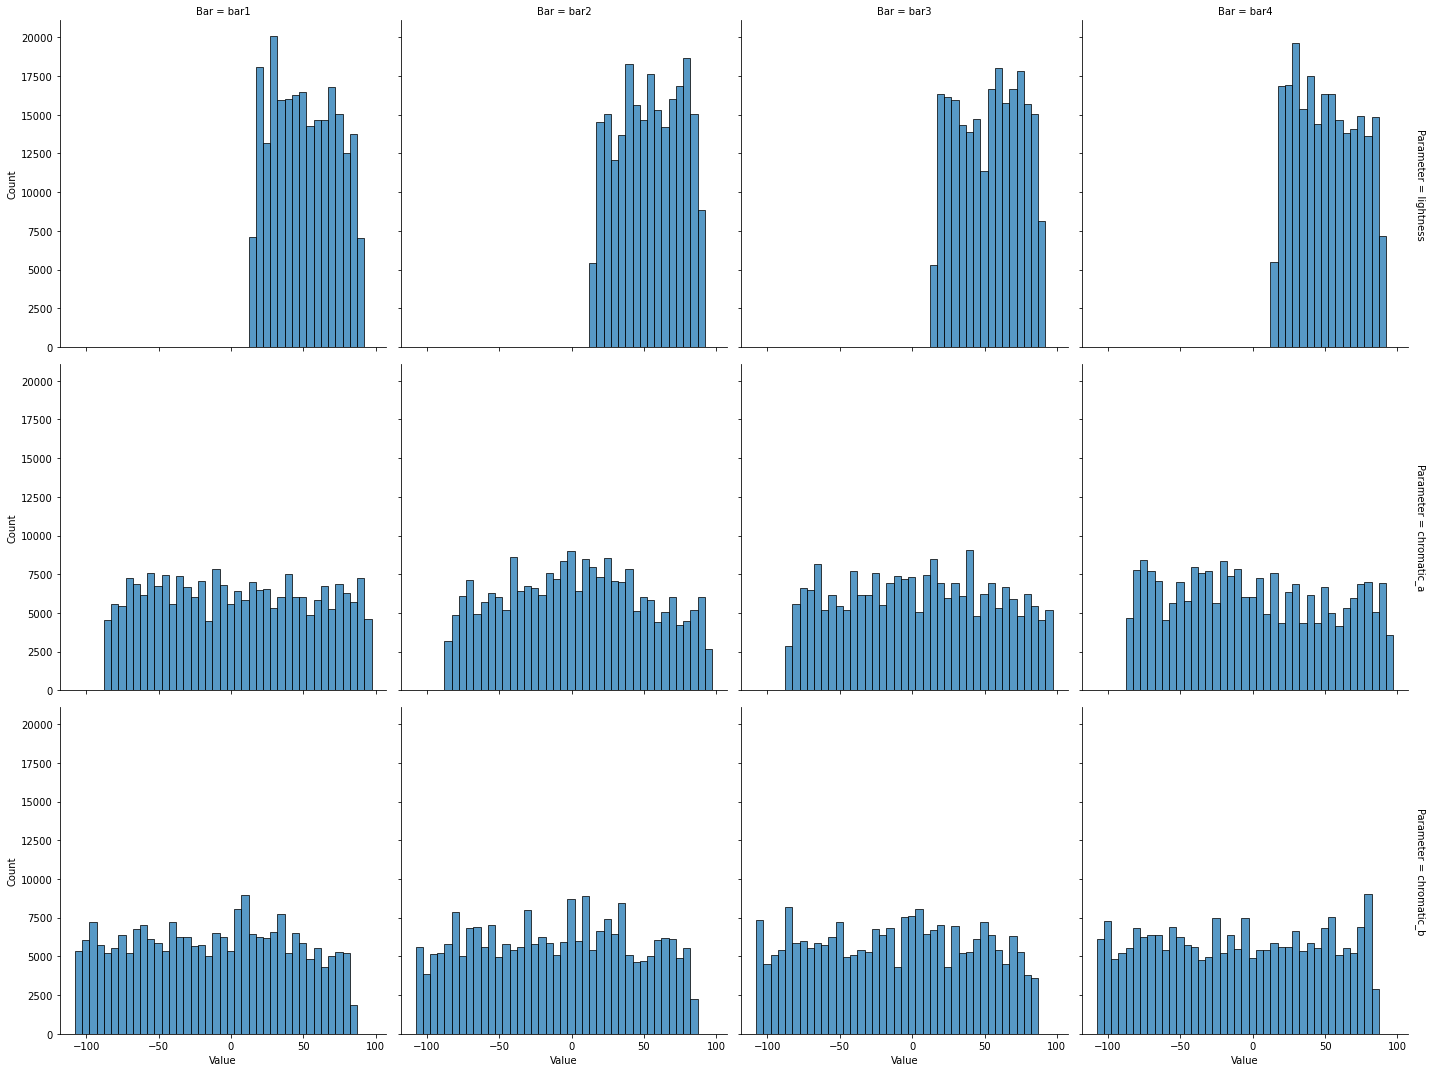

In [53]:
sns.displot(all_params_df, x='Value', row='Parameter', col='Bar', binwidth=5, height=5, facet_kws=dict(margin_titles=True))

In [54]:
lightness_df = all_params_df[all_params_df['Parameter'] =='lightness']
lightness_df

,NumberIterations,Value,Bar,Parameter
0,1,35.626571,bar1,lightness
1,2,35.626571,bar1,lightness
2,3,35.626571,bar1,lightness
3,4,35.626571,bar1,lightness
4,5,35.626571,bar1,lightness
...,...,...,...,...
47208,47209,53.788942,bar4,lightness
47209,47210,32.320964,bar4,lightness
47210,47211,32.320964,bar4,lightness
47211,47212,32.320964,bar4,lightness


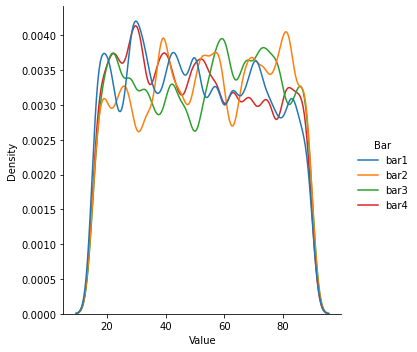

In [55]:
sns.displot(lightness_df, x='Value', hue='Bar', kind='kde', bw_adjust=1)

In [56]:
chromatica_df = all_params_df[all_params_df['Parameter'] =='chromatic_a']
chromatica_df

,NumberIterations,Value,Bar,Parameter
0,1,9.088413,bar1,chromatic_a
1,2,9.088413,bar1,chromatic_a
2,3,9.088413,bar1,chromatic_a
3,4,9.088413,bar1,chromatic_a
4,5,9.088413,bar1,chromatic_a
...,...,...,...,...
47208,47209,16.079096,bar4,chromatic_a
47209,47210,-8.488112,bar4,chromatic_a
47210,47211,-8.488112,bar4,chromatic_a
47211,47212,-8.488112,bar4,chromatic_a


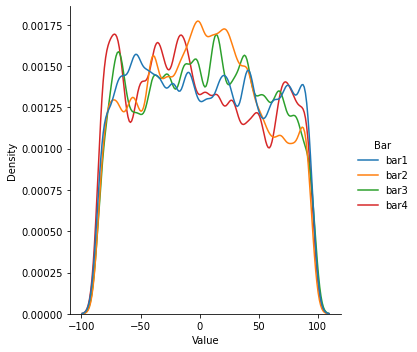

In [57]:
sns.displot(chromatica_df, x='Value', hue='Bar', kind='kde', bw_adjust=1)

In [58]:
chromaticb_df = all_params_df[all_params_df['Parameter'] =='chromatic_b']
chromaticb_df

,NumberIterations,Value,Bar,Parameter
0,1,-12.874642,bar1,chromatic_b
1,2,-12.874642,bar1,chromatic_b
2,3,-12.874642,bar1,chromatic_b
3,4,-12.874642,bar1,chromatic_b
4,5,-12.874642,bar1,chromatic_b
...,...,...,...,...
47208,47209,-19.047565,bar4,chromatic_b
47209,47210,-58.220393,bar4,chromatic_b
47210,47211,-58.220393,bar4,chromatic_b
47211,47212,-58.220393,bar4,chromatic_b


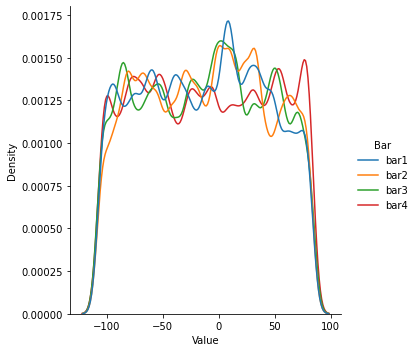

In [59]:
sns.displot(chromaticb_df, x='Value', hue='Bar', kind='kde', bw_adjust=1)

In [60]:
bar1_df = all_params_df[all_params_df['Bar'] =='bar1']
bar1_df = bar1_df.drop(columns=['NumberIterations'])
bar1_df

,Value,Bar,Parameter
0,35.626571,bar1,lightness
1,35.626571,bar1,lightness
2,35.626571,bar1,lightness
3,35.626571,bar1,lightness
4,35.626571,bar1,lightness
...,...,...,...
47208,-53.396657,bar1,chromatic_b
47209,4.134176,bar1,chromatic_b
47210,4.134176,bar1,chromatic_b
47211,4.134176,bar1,chromatic_b


In [61]:
bar1df_a = bar1_df[bar1_df['Parameter'] == 'chromatic_a']
bar1df_b = bar1_df[bar1_df['Parameter'] == 'chromatic_b']

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'discrete', 'pmax'
  **contour_kws,


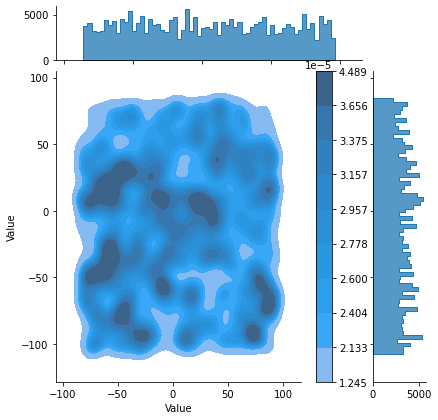

In [62]:
g = sns.JointGrid(x=bar1df_a['Value'], y=bar1df_b['Value'], marginal_ticks=True)
g.plot_joint(
    sns.kdeplot, discrete=(True,False),
    cbar=True, pmax=.8, fill=True)
g.plot_marginals(sns.histplot, element='step')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'discrete', 'pmax'
  **contour_kws,


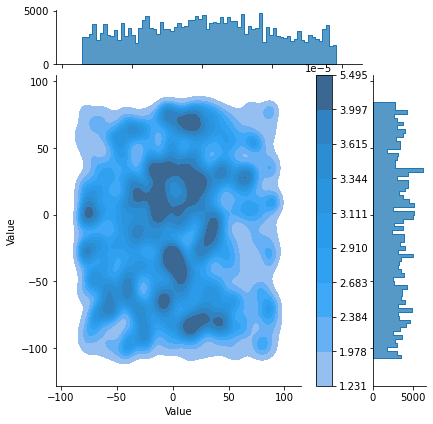

In [63]:
bar2_df = all_params_df[all_params_df['Bar'] =='bar2']
bar2_df = bar2_df.drop(columns=['NumberIterations'])
bar2df_a = bar2_df[bar2_df['Parameter'] == 'chromatic_a']
bar2df_b = bar2_df[bar2_df['Parameter'] == 'chromatic_b']

g = sns.JointGrid(x=bar2df_a['Value'], y=bar2df_b['Value'], marginal_ticks=True)
g.plot_joint(
    sns.kdeplot, discrete=(True,False),
    cbar=True, pmax=.8, fill=True)
g.plot_marginals(sns.histplot, element='step')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'discrete', 'pmax'
  **contour_kws,


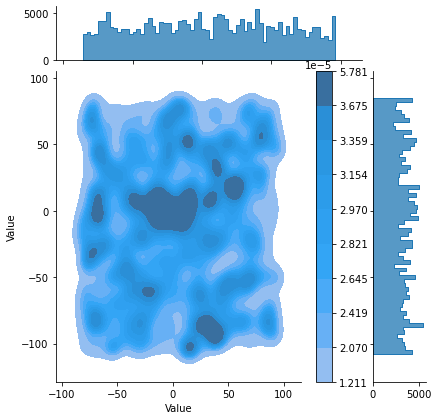

In [64]:
bar3_df = all_params_df[all_params_df['Bar'] =='bar3']
bar3_df = bar3_df.drop(columns=['NumberIterations'])
bar3df_a = bar3_df[bar3_df['Parameter'] == 'chromatic_a']
bar3df_b = bar3_df[bar3_df['Parameter'] == 'chromatic_b']

g = sns.JointGrid(x=bar3df_a['Value'], y=bar3df_b['Value'], marginal_ticks=True)
g.plot_joint(
    sns.kdeplot, discrete=(True,False),
    cbar=True, pmax=.8, fill=True)
g.plot_marginals(sns.histplot, element='step')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'discrete', 'pmax'
  **contour_kws,


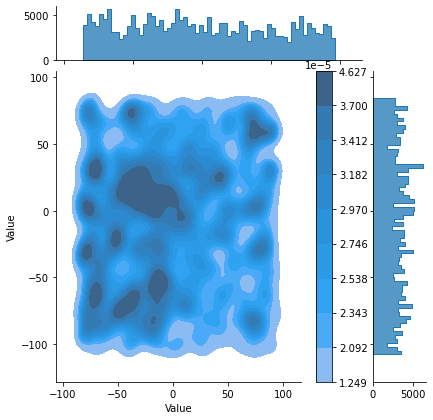

In [65]:
bar4_df = all_params_df[all_params_df['Bar'] =='bar4']
bar4_df = bar4_df.drop(columns=['NumberIterations'])
bar4df_a = bar4_df[bar4_df['Parameter'] == 'chromatic_a']
bar4df_b = bar2_df[bar4_df['Parameter'] == 'chromatic_b']

g = sns.JointGrid(x=bar4df_a['Value'], y=bar4df_b['Value'], marginal_ticks=True)
g.plot_joint(
    sns.kdeplot, discrete=(True,False),
    cbar=True, pmax=.8, fill=True)
g.plot_marginals(sns.histplot, element='step')

In [66]:
all_params_df.head()

,NumberIterations,Value,Bar,Parameter
0,1,35.626571,bar1,lightness
1,2,35.626571,bar1,lightness
2,3,35.626571,bar1,lightness
3,4,35.626571,bar1,lightness
4,5,35.626571,bar1,lightness


In [67]:
all_params = pd.DataFrame(columns=['b1.l', 'b1.a', 'b1.b', 'b2.l', 'b2.a', 'b2.b', 'b3.l', 'b3.a', 'b3.b', 'b4.l', 'b4.a', 'b4.b'])
bar1df_l = bar1_df[bar1_df['Parameter'] == 'lightness']
all_params['b1.l'] = bar1df_l['Value']
all_params['b1.a'] = bar1df_a['Value']
all_params['b1.b'] = bar1df_b['Value']

bar2df_l = bar2_df[bar2_df['Parameter'] == 'lightness']
all_params['b2.l'] = bar2df_l['Value']
all_params['b2.a'] = bar2df_a['Value']
all_params['b2.b'] = bar2df_b['Value']

bar3df_l = bar3_df[bar3_df['Parameter'] == 'lightness']
all_params['b3.l'] = bar3df_l['Value']
all_params['b3.a'] = bar3df_a['Value']
all_params['b3.b'] = bar3df_b['Value']

bar4df_l = bar4_df[bar4_df['Parameter'] == 'lightness']
all_params['b4.l'] = bar4df_l['Value']
all_params['b4.a'] = bar4df_a['Value']
all_params['b4.b'] = bar4df_b['Value']
all_params

,b1.l,b1.a,b1.b,b2.l,b2.a,b2.b,b3.l,b3.a,b3.b,b4.l,b4.a,b4.b
0,35.626571,9.088413,-12.874642,54.730530,38.038869,-89.134874,40.084532,-76.835605,-83.851453,23.136005,-59.770976,-89.134874
1,35.626571,9.088413,-12.874642,54.730530,38.038869,-89.134874,40.084532,-76.835605,-83.851453,23.136005,-59.770976,-89.134874
2,35.626571,9.088413,-12.874642,54.730530,38.038869,-89.134874,40.084532,-76.835605,-83.851453,23.136005,-59.770976,-89.134874
3,35.626571,9.088413,-12.874642,54.730530,38.038869,-89.134874,40.084532,-76.835605,-83.851453,23.136005,-59.770976,-89.134874
4,35.626571,9.088413,-12.874642,54.730530,38.038869,-89.134874,40.084532,-76.835605,-83.851453,23.136005,-59.770976,-89.134874
...,...,...,...,...,...,...,...,...,...,...,...,...
47208,83.505848,17.653187,-53.396657,34.997542,37.518359,17.053022,63.860790,11.558396,27.839610,53.788942,16.079096,17.053022
47209,66.665516,2.856605,4.134176,40.895252,53.873819,6.762000,65.224258,-30.018657,7.441711,32.320964,-8.488112,6.762000
47210,66.665516,2.856605,4.134176,40.895252,53.873819,6.762000,65.224258,-30.018657,7.441711,32.320964,-8.488112,6.762000
47211,66.665516,2.856605,4.134176,40.895252,53.873819,6.762000,65.224258,-30.018657,7.441711,32.320964,-8.488112,6.762000


In [68]:
min_clusters = np.arange(50,2000, 100)
scores=[]

for i in min_clusters:
    clusterer = hdbscan.HDBSCAN(min_cluster_size=int(i), min_samples=5)
    clusterer.fit(all_params)
    unique_elems, count_elems = np.unique(clusterer.labels_, return_counts=True)
    pct = (np.where(clusterer.probabilities_ < 0.05)[0].size)/all_params.shape[0]
    scores.append(pct)
    print(str(i) + ": " + str(unique_elems.size - 1) + " clusters with score = " + str(scores[-1]))

50: 1693 clusters with score = 0.16742497099755474
150: 576 clusters with score = 0.3855449225235793
250: 265 clusters with score = 0.5201680201141122
350: 156 clusters with score = 0.5953242451817127
450: 102 clusters with score = 0.6468213751256053
550: 25 clusters with score = 0.27197177814099716
650: 17 clusters with score = 0.20649309763365922
750: 14 clusters with score = 0.21529949067824752
850: 10 clusters with score = 0.22926810334789566
950: 5 clusters with score = 0.11924856712826197
1050: 2 clusters with score = 0.047007680796284236
1150: 2 clusters with score = 0.047007680796284236
1250: 2 clusters with score = 0.047007680796284236
1350: 2 clusters with score = 0.047007680796284236
1450: 2 clusters with score = 0.047007680796284236
1550: 2 clusters with score = 0.047007680796284236
1650: 2 clusters with score = 0.047007680796284236
1750: 2 clusters with score = 0.047007680796284236
1850: 2 clusters with score = 0.047007680796284236
1950: 2 clusters with score = 0.047007680

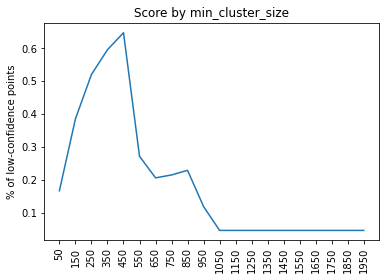

In [69]:
labels = np.array2string(min_clusters, precision=2, separator=' ')[3:-1].replace("\n","").replace("  "," ").split(" ")
x = np.arange(len(labels))
y = scores
fig, ax = plt.subplots()
line_1 = ax.plot(x, y)
ax.set_title("Score by min_cluster_size")
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("% of low-confidence points")
plt.savefig("clustersize.pdf")

In [70]:
# min_clusters = np.arange(100,1200, 50)
# scores=[]

# for i in min_clusters:
#     clusterer = hdbscan.HDBSCAN(min_cluster_size=int(i), min_samples=5)
#     clusterer.fit(all_params)
#     unique_elems, count_elems = np.unique(clusterer.labels_, return_counts=True)
#     pct = (np.where(clusterer.probabilities_ < 0.05)[0].size)/all_params.shape[0]
#     scores.append(pct)
#     print(str(i) + ": " + str(unique_elems.size - 1) + " clusters with score = " + str(scores[-1]))

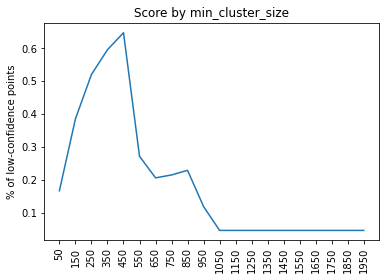

In [71]:
labels = np.array2string(min_clusters, precision=2, separator=' ')[3:-1].replace("\n","").replace("  "," ").split(" ")
x = np.arange(len(labels))
y = scores
fig, ax = plt.subplots()
line_1 = ax.plot(x, y)
ax.set_title("Score by min_cluster_size")
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("% of low-confidence points")
plt.savefig("clustersize.pdf")


In [72]:
# min_samples = np.arange(1,5, 1)

# for i in min_samples:
#     clusterer = hdbscan.HDBSCAN(min_cluster_size=1000, min_samples=int(i))
#     clusterer.fit(all_params)
#     unique_elems, count_elems = np.unique(clusterer.labels_, return_counts=True)
#     pct = (np.where(clusterer.probabilities_ < 0.05)[0].size)/all_params.shape[0]
#     scores.append(pct)
#     print(str(i) + ": " + str(unique_elems.size - 1) + " clusters with score = " + str(scores[-1]))

In [79]:
clust = hdbscan.HDBSCAN(min_cluster_size=550, min_samples=5)
clust.fit(all_params)
unique_elements, counts_elements = np.unique(clust.labels_, return_counts=True)
print(counts_elements)


[ 62364    875    822    712    634    593    658   3606   1043    672
    641    808   1477    598   3634    862    783    826   2363   1164
    631    644    620    597    676 143574]


In [80]:
labels = clust.labels_
x = all_params
def pull_cluster_mean(id):
    bool_arr = labels == id
    return np.mean(x[bool_arr], axis=0)


In [89]:
clusters = [14,7, 18, 12, 19, 24]
for clus in clusters:
    print(pull_cluster_mean(clus))

b1.l    50.176133
b1.a     9.740037
b1.b   -95.449008
b2.l    87.155286
b2.a     0.028653
b2.b   -30.905815
b3.l    72.622519
b3.a    29.255985
b3.b   -85.923325
b4.l    75.884943
b4.a   -81.413799
b4.b   -30.905815
dtype: float64
b1.l    33.749125
b1.a    85.936330
b1.b   -77.110906
b2.l    79.648231
b2.a    37.140302
b2.b    26.608392
b3.l    30.717763
b3.a    95.252838
b3.b    49.659082
b4.l    33.887557
b4.a    88.675504
b4.b    26.608392
dtype: float64
b1.l    48.425272
b1.a   -52.151164
b1.b   -43.569952
b2.l    21.776663
b2.a   -42.607224
b2.b    62.770423
b3.l    33.730995
b3.a   -61.414607
b3.b    38.676984
b4.l    34.399023
b4.a    79.870224
b4.b    62.770423
dtype: float64
b1.l    67.139032
b1.a   -56.194070
b1.b     2.608609
b2.l    82.733228
b2.a   -74.363198
b2.b     6.825683
b3.l    30.074563
b3.a    67.932194
b3.b   -85.596211
b4.l    85.081005
b4.a   -24.192344
b4.b     6.825683
dtype: float64
b1.l    47.823055
b1.a    51.555527
b1.b   -42.701178
b2.l    62.339591
b2.a

In [97]:
total_cluster = sum(counts_elements)
cluster24 = (counts_elements[25]/total_cluster) * 100
cluster14 = (counts_elements[14]/total_cluster) * 100
cluster7 = (counts_elements[7]/total_cluster) * 100
cluster18 = (counts_elements[18]/total_cluster) * 100
cluster12 = (counts_elements[12]/total_cluster) * 100
cluster19 = (counts_elements[19]/total_cluster) * 100
print(cluster24)
print(cluster14)
print(cluster7)
print(cluster18)
print(cluster12)
print(cluster19)
per_cluster = ((total_cluster/25) / total_cluster) * 100
print(per_cluster)
noise = (counts_elements[0]/total_cluster) *100
print(noise)

61.91817213436433
1.567210201960522
1.5551348344165226
1.0190747680882537
0.6369756379459799
0.5019902793291271
4.0
26.89529362549973
